# Citrus Plant Disease Detection 

#### Shlok Salunke (C226)
#### Lokesh Chaudhari (C250)
#### Tejas Deore (C245)
#### Muzammil Khatik (C243)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

## 1. CNN MODEL

### UPLOADING DATA

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/shlok/OneDrive/Documents/SIP/SIP project/Leaves",  
    shuffle=True,
    image_size=(255, 255),
    batch_size=32
)



Found 1036 files belonging to 2 classes.


### CHECKING CLASSES PRESENT IN DATASET

In [3]:
len(dataset)

33

In [4]:
class_name=dataset.class_names
class_name

['healthy', 'unhealthy']

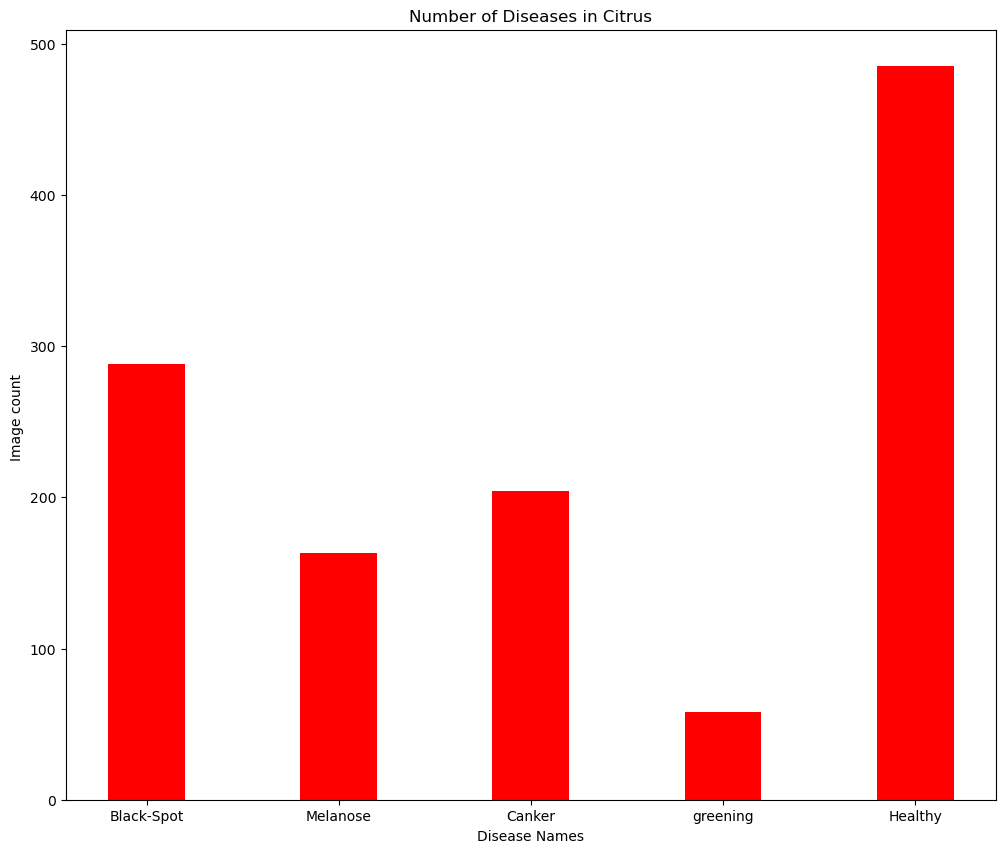

In [5]:
data = {'Black-Spot':288, 'Melanose':163, 'Canker':204,
        'greening':58,'Healthy':485}
Labels = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (12, 10))
plt.bar(Labels, values, color ='red',
        width = 0.4)
plt.xlabel("Disease Names")
plt.ylabel("Image count ")
plt.title("Number of Diseases in Citrus")
plt.show();

### PLOTTING THE IMAGES

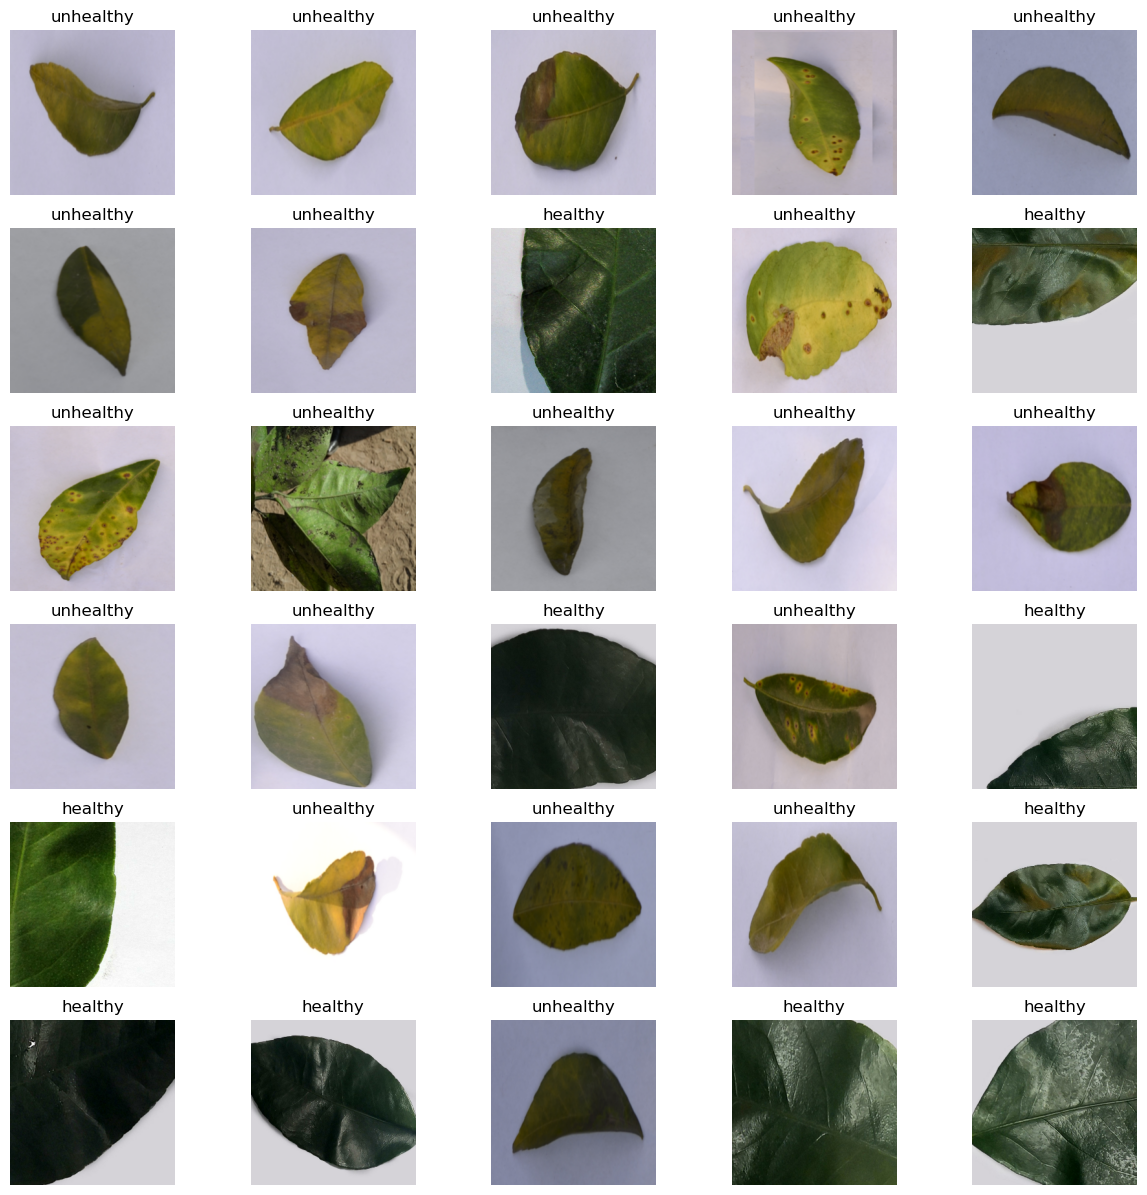

In [6]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
  for i in range(30):
    ax = plt.subplot(6,5,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_name[label_batch[i]])
    plt.axis("OFF") 

### DEFINING DATA FOR TRAINING, TESTING AND VALIDATION

In [7]:
def partition_of_data(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
   
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=10)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = partition_of_data(dataset)

In [9]:
len(train_ds)

26

In [10]:
len(val_ds)

3

In [11]:
len(test_ds)

4

### MODEL BUILDING

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

resize_and_rescale = keras.Sequential([
    layers.Resizing(255, 255),  
    layers.Rescaling(1./255)   
])


In [14]:

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Directly use layers.RandomFlip
    layers.RandomRotation(0.2)  # Directly use layers.RandomRotation
])


In [15]:
input_shape = (32, 255, 255, 3)
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax'),
])


C:\Users\shlok\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 255, 255, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 253, 253, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 126, 126, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 124, 124, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 5)                     │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,877 (718.27 KB)

 Trainable params: 183,877 (718.27 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [19]:
hist = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    epochs=10,verbose=1
)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 416ms/step - accuracy: 0.4831 - loss: 1.0585 - val_accuracy: 0.7604 - val_loss: 0.5611
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 393ms/step - accuracy: 0.7797 - loss: 0.4895 - val_accuracy: 0.9583 - val_loss: 0.2298
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 395ms/step - accuracy: 0.9006 - loss: 0.3212 - val_accuracy: 0.9271 - val_loss: 0.1830
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 397ms/step - accuracy: 0.9282 - loss: 0.2115 - val_accuracy: 0.9375 - val_loss: 0.1646
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 400ms/step - accuracy: 0.9421 - loss: 0.1464 - val_accuracy: 0.9342 - val_loss: 0.1758
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 410ms/step - accuracy: 0.9059 - loss: 0.2195 - val_accuracy: 0.9583 - val_loss: 0.1624
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 395ms/step - accuracy: 0.9516 - loss: 0.1418 - val_accuracy: 0.9583 - val_loss: 0.1166
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 444ms/step - accuracy: 0.9566 - loss: 0.1380 - val_accu

## MODEL EVALUATION

In [20]:
scores = model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9750 - loss: 0.1244


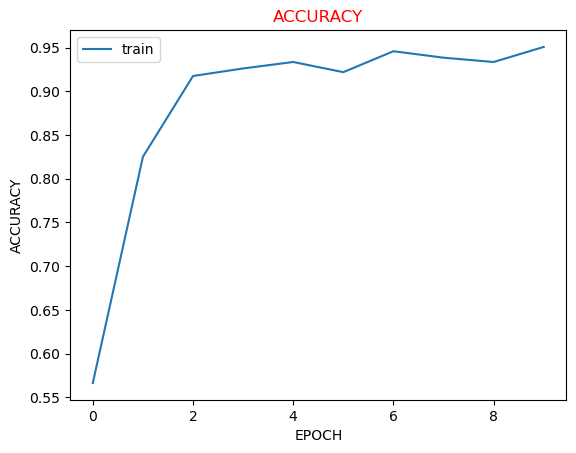

In [21]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.title("ACCURACY",color="red")
plt.ylabel("ACCURACY")
plt.xlabel("EPOCH")
plt.legend(['train'],loc='upper left')
plt.show()   

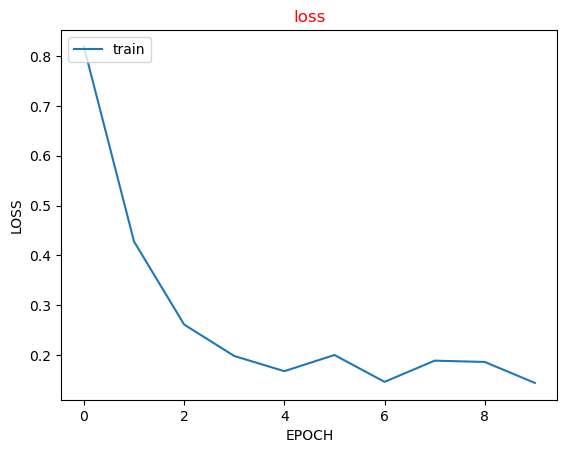

In [22]:
plt.plot(hist.history['loss'])
plt.title("loss",color="red")
plt.ylabel("LOSS")
plt.xlabel("EPOCH")
plt.legend(['train'],loc='upper left')
plt.show()   

In [23]:
y_pre=model.predict(test_ds)
y_class=[np.argmax(i) for i in y_pre]
print("Predicted Classes :-",y_class[:10])


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step
Predicted Classes :- [1, 0, 1, 0, 0, 1, 0, 1, 0, 0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


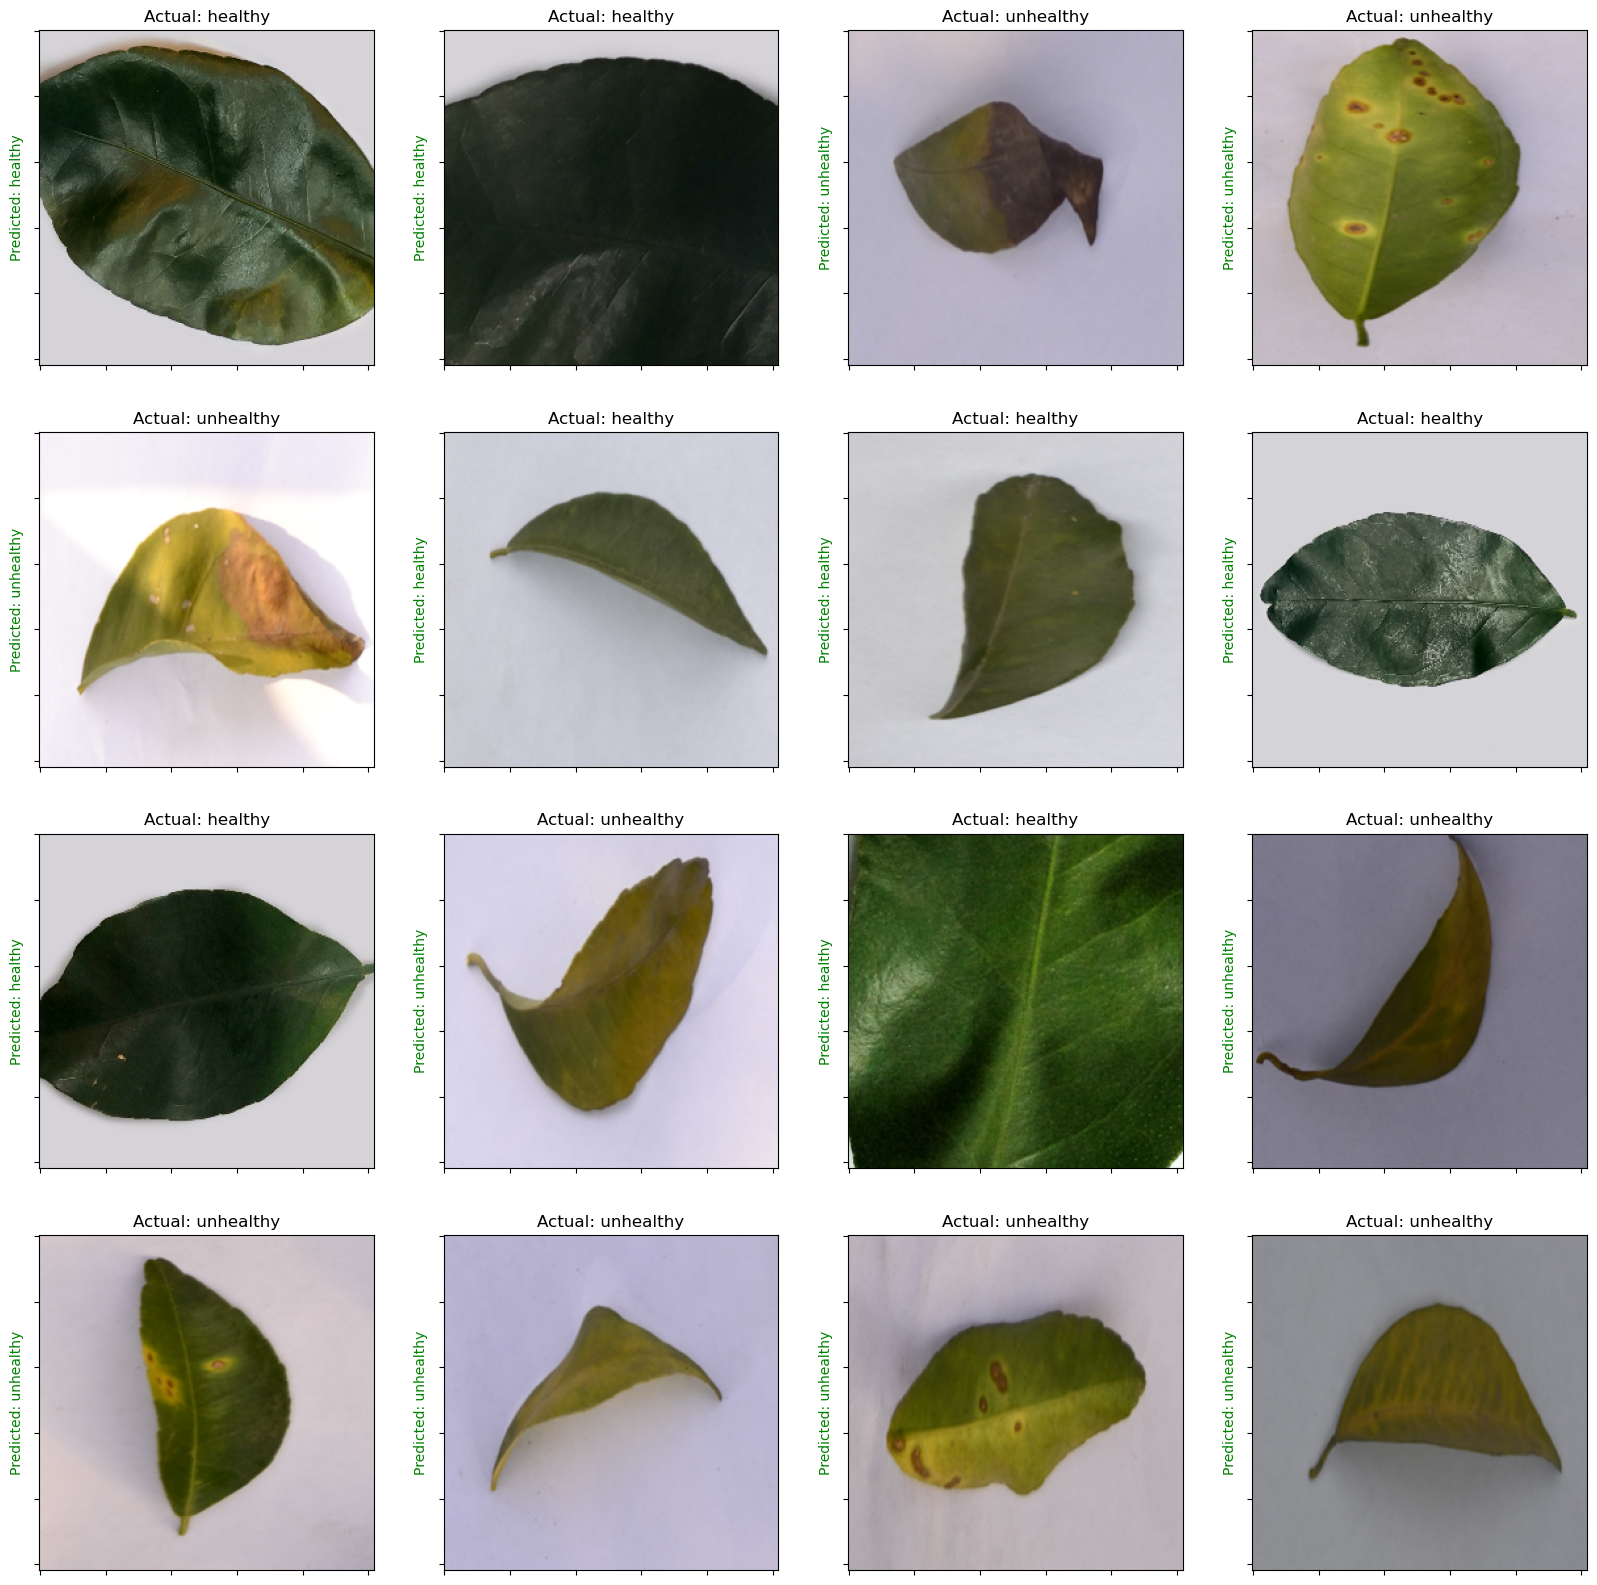

In [24]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_name[labels[i]]==class_name[np.argmax(score)]):
            plt.title("Actual: "+class_name[labels[i]])
            plt.ylabel("Predicted: "+class_name[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_name[labels[i]])
            plt.ylabel("Predicted: "+class_name[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

First Image of batch to predict :
Actual label :  unhealthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Predicted label :  unhealthy


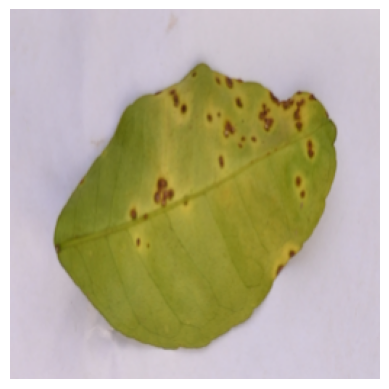

In [25]:
for batch_image, batch_label in train_ds.take(1):
    first_image = batch_image[0].numpy().astype('uint8')
    first_label = class_name[batch_label[0]]
    
    print('First Image of batch to predict :')
    plt.imshow(first_image)
    print('Actual label : ', first_label)
    
    batch_prediction = model.predict(batch_image)
    print('Predicted label : ', class_name[np.argmax(batch_prediction[0])])
    plt.axis('off')
